<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/Laboratorio%204/MINE4210_ADL2024_Lab4_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo ADL](https://github.com/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/logo_adl.png?raw=true)


# **Laboratorio 4 - Sesión 2**
## **Transformers y BERT**

## **Tabla de Contenido**

[Contexto y objetivos.](#scrollTo=KYa62M9t8wdQ&line=8&uniqifier=1)<br>
[0. Importación de librerías.](#scrollTo=cbrYuu93RJvA&line=1&uniqifier=1)<br>
[1. Entendimiento y preparación de los datos.](#scrollTo=k4aTtfgWSC7Y&line=1&uniqifier=1)<br>
[2. Modelamiento y evaluación.](#scrollTo=1Okx5TkdXp08&line=1&uniqifier=1)<br>
[3. Preguntas.](#scrollTo=LXfiOnYIxA3n&line=1&uniqifier=1)<br>

**Tutores**
- Fabián Camilo Castellanos.
- Nicolás Tibatá Castañeda.


## Contexto y Objetivos

**Problema**
- Se requiere realizar el análisis de sentimientos de un conjunto de frases del sector financiero como parte de la evaluación del sentimiento del mercado y la reputación de empresas, con el objetivo de tomar decisiones de inversión informadas.

**Objetivos**
- Construir una Red Neuronal basada en una arquitectura Transformers para llevar a cabo un análisis de sentimientos, ejemplificando así la aplicación de modelos de procesamiento del lenguaje natural.
- Conocer como implementar una red neuronal de NLP con transformers tanto en Keras como en Huggingface.

## 0. Importación de Librerías

In [1]:
!pip install keras-tuner -q
!pip install transformers -q
!pip install "tf-models-official==2.13.*" -q
# El '-q' hace referencia a 'quiet'. Por lo tanto el output de los paquetes no se muestra completo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras_tuner as kt

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, Flatten
from transformers import TFBertForSequenceClassification, BertTokenizer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

print('Tensorflow version:', tf.__version__)

import os
import shutil
import tensorflow_hub as hub
import tensorflow_text as text

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

Tensorflow version: 2.13.1


## 1. Entendimiento y preparación de los datos

Una empresa del sector financiero requiere realizar el análisis de sentimientos de un conjunto de frases del sector para poder hacer evaluación del sentimiento del mercado y la reputación de las empresas.

En primer lugar, este análisis proporciona información valiosa para la toma de decisiones de inversión. Al evaluar el sentimiento del mercado a partir de las opiniones y comentarios expresados en las frases, los inversores pueden tomar decisiones más informadas. Esto permite identificar tendencias emergentes, detectar posibles riesgos y oportunidades, y ajustar sus carteras de inversión de acuerdo a la dinámica del mercado.

Los datos se toman de https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

Puedes ver [aquí](https://www.kaggle.com/discussions/general/74235) sobre cómo cargar datos directamente de kaggle.

In [3]:
files.upload() # Cargamos el Kaggle.json (API)

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list #Correr este comando verifica que está bien montado el driver de kaggle

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          10632        198  1.0              
lainguyn123/student-performance-factors                      Student Performance Factors                     94KB  2024-09-02 10:53:57          39353        681  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           5409         96  1.0              
umera

In [4]:
!kaggle datasets download sbhatti/financial-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis
License(s): CC0-1.0
100% 276k/276k [00:00<00:00, 624kB/s]
100% 276k/276k [00:00<00:00, 623kB/s]


In [5]:
ROOT_DIR = '/content'
DATASET_NAME = 'financial-sentiment-analysis'

%cd {ROOT_DIR}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  financial-sentiment-analysis.zip
  inflating: /content/financial-sentiment-analysis/data.csv  


In [61]:
data = pd.read_csv(f'{ROOT_DIR}/{DATASET_NAME}/data.csv')
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


Realizamos la revisión de texto para cada uno de los sentimientos:

In [63]:
unique_sentiments = data['Sentiment'].unique()

for sentiment in unique_sentiments:
    row = data[data['Sentiment'] == sentiment].iloc[0]  # Obtener la primera fila con el valor de sentimiento específico
    print("Sentiment:", sentiment)
    print("Sentence:", row['Sentence'])
    print()


Sentiment: positive
Sentence: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .

Sentiment: negative
Sentence: $ESI on lows, down $1.50 to $2.50 BK a real possibility

Sentiment: neutral
Sentence: According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .



In [64]:
data["Sentiment"].value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


Ahora vamos a pasar el sentimiento (clase) a un valor entero usando LabelEncoder

In [65]:
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

etiquetas_unicas = label_encoder.classes_
for valor_numerico, etiqueta_original in enumerate(etiquetas_unicas):
    print(f'Valor numérico: {valor_numerico}, Etiqueta original: {etiqueta_original}')

Valor numérico: 0, Etiqueta original: negative
Valor numérico: 1, Etiqueta original: neutral
Valor numérico: 2, Etiqueta original: positive


Hacemos la división de los conjuntos para entrenamiento, validación y prueba:

In [66]:
# Divide los datos en entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, stratify=data['Sentiment'], random_state=42, shuffle = True)

# Ahora divide el conjunto de entrenamiento en entrenamiento y validación
train, val = train_test_split(train, test_size=0.2, stratify=train['Sentiment'], random_state=42, shuffle = True)

print("Tamaño de datos de entrenamiento:", train.shape)
print("Tamaño de datos de validación:", val.shape)
print("Tamaño de datos de prueba:", test.shape)

train

Tamaño de datos de entrenamiento: (3738, 2)
Tamaño de datos de validación: (935, 2)
Tamaño de datos de prueba: (1169, 2)


,Sentence,Sentiment
3097,"Digia will also set up two subsidiaries , Digi...",1
5048,$BBRY Sierra. Has a great cash balance and imp...,2
5727,"Britain's FTSE gains, Land Securities up after...",2
185,The Finnish company sold its UK operation - co...,1
4265,Russian Media Ventures ' minority shareholder ...,1
...,...,...
326,( I&H ) in a move to enhance growth .,2
2821,"In addition , a further 29 employees can be la...",0
4365,"The paper industry 's de-inking sludge , which...",1
1603,$JE LOOKS like we are bouncing. Would be nice...,2


Revisamos la dristibución de sentimientos del conjunto de entrenamiento:

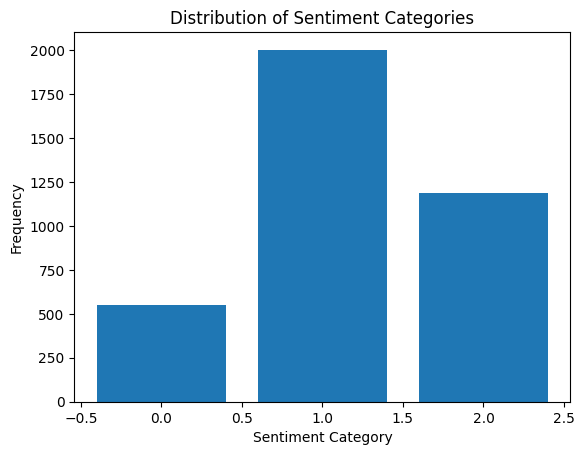

In [67]:
# Create a bar plot to visualize the distribution
unique, counts = np.unique(train['Sentiment'], return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')
plt.show()

Separamos las oraciones y el sentimiento que representan.


In [68]:
X_train, X_test, X_val= train['Sentence'], test['Sentence'], val['Sentence']
y_train, y_test, y_val= train['Sentiment'], test['Sentiment'], val['Sentiment']

print("x_train", X_train.shape, " y_train:", y_train.shape)
print("x_test:", X_test.shape, "y_test", y_test.shape)
print("x_val", X_val.shape, "y_val:", y_val.shape)

X_train

x_train (3738,)  y_train: (3738,)
x_test: (1169,) y_test (1169,)
x_val (935,) y_val: (935,)


,Sentence
3097,"Digia will also set up two subsidiaries , Digi..."
5048,$BBRY Sierra. Has a great cash balance and imp...
5727,"Britain's FTSE gains, Land Securities up after..."
185,The Finnish company sold its UK operation - co...
4265,Russian Media Ventures ' minority shareholder ...
...,...
326,( I&H ) in a move to enhance growth .
2821,"In addition , a further 29 employees can be la..."
4365,"The paper industry 's de-inking sludge , which..."
1603,$JE LOOKS like we are bouncing. Would be nice...


Una de las ventajas de utilizar transformers es que también incorporan una capa de preprocesamiento de datos, lo que simplifica el proceso para utilizarlos.

## 2. Modelamiento y evaluación

BERT (Bidirectional Encoder Representations from Transformers) es un tipo de estructura utilizado en la mayoría de casos de NLP, veamos cómo se construye una versión más pequeña que la original:

In [18]:
import torch
import torch.nn as nn

# Hiper parámetros
block_size = 256 # Máximo número de tokens como input al modelo
batch_size = 128 # Tamaño del lote
model_dim = 512 # Dimensiones de los embeddings de los tokens
heads_num = 8 # Número de cabezas en el mecanismo de atención
blocks_num = 3 # Número de bloques de Transformner en el modelo

# Usar GPU si está disponible
device = 'cpu'

class SelfAttention(nn.Module):
    def __init__(self, embed_dim, head_dim):
        # embed_dim son las dimensiones del embedding de los tokens originalmente
        # head_dim son las dimensiones del vector resultante del mecanismo de atención
        super().__init__()
        self.head_dim = head_dim

        self.Wq = nn.Linear(embed_dim, head_dim, bias=False) # Matriz para generar la representación Q de los tokens
        self.Wk = nn.Linear(embed_dim, head_dim, bias=False) # Matriz para generar la representación K de los tokens
        self.Wv = nn.Linear(embed_dim, head_dim, bias=False) # Matriz para generar la representación V de los tokens

    def forward(self, x): # x.shape = [batch_size, block_size, embed_dim]
        N, T, D = x.shape
        # Crear representaciones de los tokens
        Q = self.Wq(x) # [N, T, D] @ [D, head_dim] = [N, T, head_dim]
        K = self.Wk(x) # [N, T, D] @ [D, head_dim] = [N, T, head_dim]
        V = self.Wv(x) # [N, T, D] @ [D, head_dim] = [N, T, head_dim]
        # Calcular puntajes de similitud
        att_weights = Q @ K.transpose(-1,-2) # [N, T, head_dim] @ [N, head_dim, T] = [N, T, T]
        att_weights = att_weights * self.head_dim**-0.5 # Reducir el tamaño de los puntajes de similitud

        # Los tokes futuros no se enmascaran, de modo que el modelo ve el contexto completo
        # masked_att = att_weights.masked_fill(self.mask[:T,:T] == 0, -torch.inf)

        att_weights = torch.nn.functional.softmax(att_weights, dim=2)
        # Resultado del mecanismo de atención
        weighted_output = att_weights @ V # [N, T, T] @ [N, T, head_dim] = [N, T, head_dim]

        return weighted_output

class MultiHeadAttention(nn.Module):
    def __init__(self, heads_num, embed_dim, head_dim) -> None:
        super().__init__()
        self.heads = nn.ModuleList([SelfAttention(embed_dim, head_dim//heads_num) for _ in range(heads_num)])
        self.dense = nn.Linear(head_dim, head_dim, bias=False)

    def forward(self, x): # x: [batch_size, block_size, emb_dim]
        heads = [h(x) for h in self.heads] # [batch_size, block_size, head_dim/heads_num] por cada elemento en la lista
        att = torch.concat(heads, dim=-1) # Se concatenan los resultados de cada cabeza para obtener [batch_size, block_size, head_dim]
        output = self.dense(att) # [batch_size, block_size, head_dim]
        return output

class FeedForward(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim) -> None:
        super().__init__()
        self.dense1 = nn.Linear(in_dim, hidden_dim)
        self.dense2 = nn.Linear(hidden_dim, out_dim)

    def forward(self, x): # x: [batch_size, block_size, head_dim]
        dense1 = F.relu(self.dense1(x)) # [batch_size, block_size, head_dim*4]
        output = self.dense2(dense1) # [batch_size, block_size, head_dim]
        return output

class Block(nn.Module):
    def __init__(self, heads_num, model_dim) -> None:
        super().__init__()
        self.attention = MultiHeadAttention(heads_num, model_dim, model_dim)
        self.ln1 = nn.LayerNorm(model_dim)
        self.ffd = FeedForward(model_dim, model_dim*4, model_dim)
        self.ln2 = nn.LayerNorm(model_dim)

        self.drop1 = nn.Dropout(0.1)
        self.drop2 = nn.Dropout(0.1)
        self.drop3 = nn.Dropout(0.1)

    def forward(self, x): # x: [batch_size, block_size, emb_dim]
        att = self.attention(x) # [batch_size, block_size, head_dim], emb_dim y head_dim deben ser iguales para que funcionen las conexiones residuales
        att = self.drop1(att)
        x = self.ln1(att + x)

        ffd = self.ffd(x) # [batch_size, block_size, head_dim]
        ffd = self.drop2(ffd)
        x = self.ln2(ffd + x)
        x = self.drop3(x)
        return x # [batch_size, block_size, head_dim]


class SimpleBERT(nn.Module):
    def __init__(self, vocab_size, model_dim, block_size, blocks_num, heads_num) -> None:
        super().__init__()
        self.E = nn.Embedding(vocab_size, model_dim)
        self.posE = nn.Embedding(block_size, model_dim) # Embedding de posición. Cada posición en el contexto (0 - block_size-1) tiene su propio embedding
        self.ln1 = nn.LayerNorm(model_dim)
        self.blocks = nn.Sequential(*[Block(heads_num, model_dim) for _ in range(blocks_num)]) # El bloque se repite el número de veces deseado
        self.dense = nn.Linear(model_dim, vocab_size, bias=False)

        # Regularización
        self.drop1 = nn.Dropout(0.1)

    def forward(self, x): # x: [batch_size, block_size]
        emb1 = self.E(x) # [batch_size, block_size, emb_dim]

        # Positional embedding
        positions = torch.arange(x.shape[1], device=device) # Se genera un número por cada token que representa su posicion en el contexto (de 0 a block_size-1)
        emb2 = self.posE(positions) # [block_size, emb_dim]

        emb = emb1 + emb2 # [batch_size, block_size, emb_dim] Se suman los embeddings
        emb = self.ln1(emb)
        emb = self.drop1(emb)

        x = self.blocks(emb) # [batch_size, block_size, head_dim]

        self.contextual_embeddings = x # Se guarda el embedding contextual para usarlos más adelante

        logits = self.dense(x) # [batch_size, block_size, vocab_size]
        return logits

Comparemos el modelo original con el construido:

<img src="https://github.com/fcastellanosp/MINE-4210_202420_ADL/raw/main/Laboratorios/Laboratorio%204/lab4_s2_image1.png" alt="Original Bert" width="1000" height="600"/>

<img src="https://github.com/fcastellanosp/MINE-4210_202420_ADL/raw/main/Laboratorios/Laboratorio%204/lab4_s2_image2.png" alt="Modified Bert" width="1000" height="600"/>


 Con el código de las siguientes secciones podemos seleccionar uno de los modelos BERT y su correspondiente modelo de preprocesamiento utilizando TensorFlow Hub. Pueden ver más información [aquí](https://huggingface.co/transformers/v3.0.2/model_doc/bert.html).

### 2.1. Modelo Lambert

BERT entrenado con LAMB(Layer-wise Adaptive Moments optimizer for Batch training, un optimizador de gradiente descendente estocástico) y técnicas de RoBERTa (Robustly Optimized BERT Approach).

In [25]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/lambert_en_uncased_L-24_H-1024_A-16/2'

tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'


print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/lambert_en_uncased_L-24_H-1024_A-16/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [26]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [27]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [29]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessing_layer = bert_preprocess_model(text_input)
outputs = bert_model(preprocessing_layer)

# Neural network layers
#l = tf.keras.layers.Dropout(0.1, name="dropout")
l = tf.keras.layers.Dense(512, activation='sigmoid', name="capaOculta1")(outputs['pooled_output'])
l = tf.keras.layers.Dropout(0.2, name="dropout")(l)
l = tf.keras.layers.Dense(3, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [31]:
metrics = ['accuracy']

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=metrics)

In [34]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_val, y_val),
          epochs=20,
          #callbacks= EarlyStopping(monitor='val_accuracy', patience=4)
          )

Epoch 1/20
117/117 [==============================] - 169s 1s/step - loss: 0.8959 - accuracy: 0.5902 - val_loss: 0.8004 - val_accuracy: 0.6396
Epoch 2/20
117/117 [==============================] - 162s 1s/step - loss: 0.7685 - accuracy: 0.6597 - val_loss: 0.7841 - val_accuracy: 0.6642
Epoch 3/20
117/117 [==============================] - 151s 1s/step - loss: 0.7229 - accuracy: 0.6814 - val_loss: 0.7731 - val_accuracy: 0.6492
Epoch 4/20
117/117 [==============================] - 160s 1s/step - loss: 0.6996 - accuracy: 0.6846 - val_loss: 0.7946 - val_accuracy: 0.6503
Epoch 5/20
117/117 [==============================] - 151s 1s/step - loss: 0.6753 - accuracy: 0.7084 - val_loss: 0.7879 - val_accuracy: 0.6439
Epoch 6/20
117/117 [==============================] - 160s 1s/step - loss: 0.6717 - accuracy: 0.7012 - val_loss: 0.8133 - val_accuracy: 0.6342
Epoch 7/20
117/117 [==============================] - 151s 1s/step - loss: 0.6541 - accuracy: 0.7057 - val_loss: 0.7894 - val_accuracy: 0.6652

**Evaluación**

In [ ]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 120s 1s/step
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       550
           1       0.88      0.93      0.91      2003
           2       0.94      0.93      0.93      1185

    accuracy                           0.89      3738
   macro avg       0.87      0.84      0.85      3738
weighted avg       0.89      0.89      0.89      3738



In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 38s 1s/step
              precision    recall  f1-score   support

           0       0.33      0.24      0.28       172
           1       0.73      0.81      0.77       626
           2       0.71      0.67      0.69       371

    accuracy                           0.68      1169
   macro avg       0.59      0.57      0.58      1169
weighted avg       0.67      0.68      0.67      1169



### 2.2. Modelo distilbert huggingface

Es un modelo de lenguaje natural basado en la arquitectura de BERT, pero más pequeño, rápido y económico. Fue propuesto por Hugging Face en 2019. El modelo fue entrenado mediante destilación de BERT base y tiene un 40% menos de parámetros que bert-base-uncased, corre un 60% más rápido y preserva más del 95% del rendimiento de BERT.

Para trabajar con los transformes de huggingface se utiliza la librería transformers, en este caso importamos el tokenizador (pro-proceamiento que requiere el transformers y el modelo)

In [37]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split

Hacemos el preprocesamiento de nuestros conjuntos de datos:

In [57]:
# Tokenización
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
X_train = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_train]
X_val = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_val]
X_test = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_test]


Ahora vamos a hacer un padding, lo cual es una práctica común en el procesamiento de texto para asegurar que todas las secuencias de texto tengan la misma longitud.

In [58]:
max_sequence_length = max(len(seq) for seq in X_train)

In [59]:
# Padding
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_sequence_length, padding='post', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')

Ahora generamos nuestro modelo a partir del modelo DistilBERT

In [ ]:
# Crear el modelo DistilBERT
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

# Agregar una capa de clasificación explícita
classification_layer = tf.keras.layers.Dense(3, activation='softmax')  # 'num_classes' es el número de clases en tu tarea de clasificación

# Crear el modelo combinado
input_ids = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int32)
outputs = model(input_ids)[0]  # Salidas de la capa de logits
#outputs = classification_layer(outputs)

combined_model = tf.keras.Model(inputs=input_ids, outputs=outputs)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)  # from_logits=False ya que estamos usando 'softmax' en la capa de clasificación
combined_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


In [ ]:
# Entrenamiento
history = combined_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=16,
    callbacks= EarlyStopping(monitor='val_accuracy', patience=3)
)

Epoch 1/15
234/234 [==============================] - 104s 265ms/step - loss: 0.8140 - accuracy: 0.6220 - val_loss: 0.5969 - val_accuracy: 0.7604
Epoch 2/15
234/234 [==============================] - 46s 196ms/step - loss: 0.4715 - accuracy: 0.8063 - val_loss: 0.4892 - val_accuracy: 0.7807
Epoch 3/15
234/234 [==============================] - 47s 202ms/step - loss: 0.3395 - accuracy: 0.8513 - val_loss: 0.5192 - val_accuracy: 0.7679
Epoch 4/15
234/234 [==============================] - 44s 187ms/step - loss: 0.2554 - accuracy: 0.8745 - val_loss: 0.5045 - val_accuracy: 0.7743
Epoch 5/15
234/234 [==============================] - 47s 201ms/step - loss: 0.2049 - accuracy: 0.8975 - val_loss: 0.5405 - val_accuracy: 0.7775


**Evaluación**

In [ ]:
# Evaluación
results = combined_model.evaluate(X_test, y_test)
print("Loss:", results[0])
print("Accuracy:", results[1])

37/37 [==============================] - 5s 118ms/step - loss: 0.5270 - accuracy: 0.7716
Loss: 0.5269625782966614
Accuracy: 0.7715996503829956


In [ ]:
y_pred = combined_model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 17s 113ms/step
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       550
           1       0.99      0.85      0.92      2003
           2       1.00      0.99      0.99      1185

    accuracy                           0.92      3738
   macro avg       0.88      0.94      0.90      3738
weighted avg       0.94      0.92      0.92      3738



In [ ]:
y_pred = combined_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 4s 107ms/step
              precision    recall  f1-score   support

           0       0.47      0.66      0.55       172
           1       0.85      0.77      0.81       626
           2       0.85      0.82      0.84       371

    accuracy                           0.77      1169
   macro avg       0.72      0.75      0.73      1169
weighted avg       0.79      0.77      0.78      1169



## 3. Preguntas

1. ¿Cuáles son las diferencias en usar BERT como feature extraction y fine-tuning? ¿Qué argumento debemos modificar dentro del código para escoger entre las dos opciones?




In [36]:
print(f'{bert_model.trainable}')

False


2. ¿Hay presencia de sobreajuste?¿Porqué? ¿Qué podemos hacer para mejorar nuestros modelos?
- Capas densas con menos neuronas, balance de clases, capas de dropout, ajuste del learning rate.